In [275]:
# Import Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from datetime import datetime
%matplotlib inline


In [357]:
def lineplot(df, x_axis, y_axis, title_name):
    '''
    This function helps create a cleaner lineplot creation using seaborn library. This will also help to 
    make sure each graph have the same styling applied.
    
    Input:
    df: DataFrame to use to create the graph
    x_axis: the x_axis input to the plot
    y_axis: the y_axis input to the plot
    title_name: name the title of the graph
    
    Output:
    seaborn line plot with the chosen parameters
    
    '''
    figure(figsize=(10, 6), dpi=80)
    ax = sns.lineplot(data=df, x=x_axis, y=y_axis, marker='o')
    
    if (df[y_axis].min() >= 0) & (df[y_axis].max() <= 1):
        ax.set_ylim(0, 1)
    else:
        ax.set_ylim(df[y_axis].min() - 50, df[y_axis].max() + 50)
    
    ax.set_title(title_name)
    ax.set(xticks=df[x_axis])

In [358]:
def hboxplot(df, x_axis, y_axis, title_name):
    '''
    This function helps create a cleaner horizontal boxplot creation using seaborn library. This will also help to 
    make sure each graph have the same styling applied.
    
    Input:
    df: DataFrame to use to create the graph
    x_axis: the x_axis input to the plot
    y_axis: the y_axis input to the plot
    title_name: name the title of the graph
    
    Output:
    seaborn boxplot with the chosen parameters
    
    '''
    
    figure(figsize=(10, 6), dpi=80)
    ax = sns.boxplot(data=df, x=x_axis, y=y_axis, fliersize=0)
    
    if (df[y_axis].quantile(.25) >= 0) & (df[y_axis].quantile(.75) <= 1):
        ax.set_ylim(0, 1)
    else:
        ax.set_ylim(df[y_axis].quantile(.25) - 150, df[y_axis].quantile(.75) + 150)
        
    plt.show()

In [ ]:
def vboxplot(df, x_axis, y_axis, title_name):
    '''
    This function helps create a cleaner vertical boxplot creation using seaborn library. This will also help to 
    make sure each graph have the same styling applied.
    
    Input:
    df: DataFrame to use to create the graph
    x_axis: the x_axis input to the plot
    y_axis: the y_axis input to the plot
    title_name: name the title of the graph
    
    Output:
    seaborn boxplot with the chosen parameters
    
    '''
    
    figure(figsize=(10, 6), dpi=80)
    ax = sns.boxplot(data=df, x=x_axis, y=y_axis, fliersize=0)
    
    if (df[y_axis].min() >= 0) & (df[y_axis].max() <= 1):
        ax.set_ylim(0, 1)
    else:
        ax.set_ylim(df[y_axis].min() - 50, df[y_axis].max() + 50)
        
    plt.show()

## Data Understanding and Pre-processing

AirBnB helps provide a platform that connects people who wants to rent their accomodations with those who are seeking it. In this project, we will be looking at the performance of rentables AirBnB rooms and how they fare in Seattle.

There are several that we will try to explore:
  1. How busy AirBnB is in Seattle
  2. What are the densest neighbourhood with listings
  3. What are the market's current price ranges
  

### Import Datasets - Seattle AirBnB Open Data

In [277]:
df_calendar = pd.read_csv('calendar.csv')
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [278]:
df_listings = pd.read_csv('listings.csv')
# to see all columns without being cut off
pd.set_option('max_columns', None)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [279]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


#### Listings DataFrame pre-processing

In [280]:
# removing dollar sign
df_listings['price'] = df_listings['price'].astype('str').str.replace('$','')
# removing commas
df_listings['price'] = df_listings['price'].astype('str').str.replace(',','')
# change price type to float
df_listings['price'] = df_listings['price'].astype('float64')

/var/folders/kf/_ffsr2ss3vdgl3tdvn4jg7qw0000gp/T/ipykernel_13447/1560470664.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_listings['price'] = df_listings['price'].astype('str').str.replace('$','')


In [281]:
df_listings[['price']]

,price
0,85.0
1,150.0
2,975.0
3,100.0
4,450.0
...,...
3813,359.0
3814,79.0
3815,93.0
3816,99.0


In [282]:
# renaming id to listing_id for easier data merging
df_listings = df_listings.rename(columns={'id': 'listing_id', 'price':'listing_price'})
df_listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,listing_price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern

#### Calendar DataFrame pre-processing

In [283]:
df_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [284]:
# removing dollar sign
df_calendar['price'] = df_calendar['price'].astype('str').str.replace('$','')
# removing commas
df_calendar['price'] = df_calendar['price'].astype('str').str.replace(',','')
# change price type to float
df_calendar['price'] = df_calendar['price'].astype('float64')

/var/folders/kf/_ffsr2ss3vdgl3tdvn4jg7qw0000gp/T/ipykernel_13447/3895020896.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].astype('str').str.replace('$','')


In [285]:
df_calendar.head(5)

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [286]:
# Addition of month column
df_calendar['date'] = df_calendar['date'].astype('datetime64[ns]')
df_calendar['month'] = df_calendar['date'].dt.month
df_calendar['year'] = df_calendar['date'].dt.year
df_calendar[['date','month', 'year']].head(5)

,date,month,year
0,2016-01-04,1,2016
1,2016-01-05,1,2016
2,2016-01-06,1,2016
3,2016-01-07,1,2016
4,2016-01-08,1,2016


In [287]:
# addition of neighbourhood data
df_calendar = pd.merge(df_calendar, df_listings[['listing_id', 'host_neighbourhood', 'guests_included', 'listing_price']], how='left', on='listing_id')


In [288]:
df_calendar.head(5)

,listing_id,date,available,price,month,year,host_neighbourhood,guests_included,listing_price
0,241032,2016-01-04,t,85.0,1,2016,Queen Anne,2,85.0
1,241032,2016-01-05,t,85.0,1,2016,Queen Anne,2,85.0
2,241032,2016-01-06,f,NaN,1,2016,Queen Anne,2,85.0
3,241032,2016-01-07,f,NaN,1,2016,Queen Anne,2,85.0
4,241032,2016-01-08,f,NaN,1,2016,Queen Anne,2,85.0


#### end result

In [289]:
df_calendar.head(5)

,listing_id,date,available,price,month,year,host_neighbourhood,guests_included,listing_price
0,241032,2016-01-04,t,85.0,1,2016,Queen Anne,2,85.0
1,241032,2016-01-05,t,85.0,1,2016,Queen Anne,2,85.0
2,241032,2016-01-06,f,NaN,1,2016,Queen Anne,2,85.0
3,241032,2016-01-07,f,NaN,1,2016,Queen Anne,2,85.0
4,241032,2016-01-08,f,NaN,1,2016,Queen Anne,2,85.0


## Data Analysis

### 1. Monthly Listing Occupancy Rate

In this section, we would like to know what is the average occupancy rate of listings in a month.

We first need to understand how the availability data works.

In [290]:
# getting example of 1 listing in a month
df_calendar.groupby(['listing_id', 'month']).agg(
    total_days = ('date', 'nunique')
).reset_index()

,listing_id,month,total_days
0,3335,1,30
1,3335,2,29
2,3335,3,31
3,3335,4,30
4,3335,5,31
...,...,...,...
45811,10340165,8,31
45812,10340165,9,30
45813,10340165,10,31
45814,10340165,11,30


It seems the data told us that each listings will have their daily availabilities shown for a whole year. This means that we can calculate availability by looking at how many days they are available in that month.

#### prices missing values

In [362]:
df_calendar.head()

,listing_id,date,available,price,month,year,host_neighbourhood,guests_included,listing_price,occupied
0,241032,2016-01-04,t,85.0,1,2016,Queen Anne,2,85.0,0.0
1,241032,2016-01-05,t,85.0,1,2016,Queen Anne,2,85.0,0.0
2,241032,2016-01-06,f,NaN,1,2016,Queen Anne,2,85.0,1.0
3,241032,2016-01-07,f,NaN,1,2016,Queen Anne,2,85.0,1.0
4,241032,2016-01-08,f,NaN,1,2016,Queen Anne,2,85.0,1.0


In [364]:
df_calendar['price'].isna().sum()

459028

We can see that there are instances where we have price in null values. If you look closely, these null values is due
to unavailable listings, meaning that we can do two options:
- to replace the null value with 0 price
- to use listing price from the listing datasource to evaluate unavailable listings

In [365]:
df_calendar['price'] = df_calendar['price'].fillna(0)

In [366]:
df_calendar.head()

,listing_id,date,available,price,month,year,host_neighbourhood,guests_included,listing_price,occupied
0,241032,2016-01-04,t,85.0,1,2016,Queen Anne,2,85.0,0.0
1,241032,2016-01-05,t,85.0,1,2016,Queen Anne,2,85.0,0.0
2,241032,2016-01-06,f,0.0,1,2016,Queen Anne,2,85.0,1.0
3,241032,2016-01-07,f,0.0,1,2016,Queen Anne,2,85.0,1.0
4,241032,2016-01-08,f,0.0,1,2016,Queen Anne,2,85.0,1.0


#### understanding occupancy rate

To understand occupancy rate, we need to establish some assumptions. In the data, we only have information on whether a listing is availabile or not. In this case, moving forward we will took into assumption that `unavailable` listing equals to it being occupied during the day (hence there are visitor).

In [291]:
# Using previous assumption, we will start converting availability column into numbers for easier occupancy counting.
# meaning that:
# True = 0
# False = 1
df_calendar.loc[df_calendar['available'] == 't', 'occupied'] = 0
df_calendar.loc[df_calendar['available'] == 'f', 'occupied'] = 1

In [292]:
# counting average availability
df_avg_occupancy = df_calendar.groupby(['month']).agg(
    average_occupancy = ('occupied', 'mean')
).reset_index()

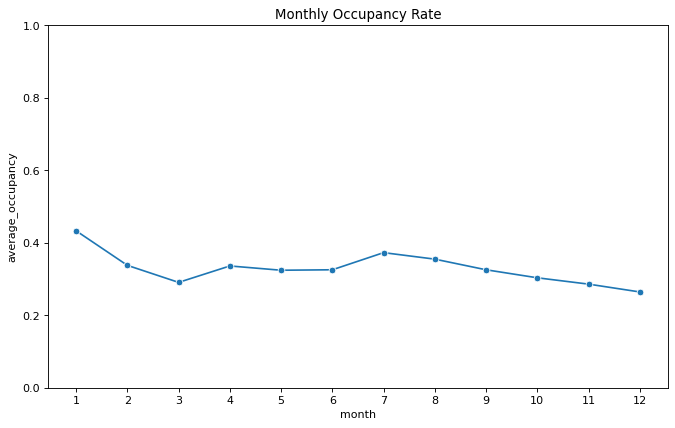

In [336]:
# visualize average occupancy
lineplot(df_avg_occupancy, 'month', 'average_occupancy', 'Monthly Occupancy Rate')

As you can see here, the start and middle of the year are both the busiest time of the year for AirBnB in Seattle.

In [324]:
df_avg_occupancy_per_neighbourhood = df_calendar.groupby(['host_neighbourhood']).agg(
    total_listings = ('listing_id', 'nunique')
    ,average_occupancy = ('occupied', 'mean')
).reset_index()
df_avg_occupancy_per_neighbourhood = df_avg_occupancy_per_neighbourhood.sort_values(by='total_listings', ascending=False)


In [296]:
# gathering top 15 of neighbourhoods with listings and their busy rates
df_avg_occupancy_per_neighbourhood.head(15)

,host_neighbourhood,total_listings,average_occupancy
13,Capitol Hill,405,0.344664
6,Belltown,254,0.395049
5,Ballard,210,0.315943
61,Minor,191,0.305085
78,Queen Anne,189,0.370312
28,Fremont,147,0.324611
97,Wallingford,134,0.330853
67,North Beacon Hill,101,0.277960
80,Ravenna,100,0.269397
15,Central Business District,93,0.166357


Now if we want to look at the busiest neighbourhood and their total listings, we have ourselves the list above for the top 15 positions. We see Capitol hill, Belltown, and Ballard are the top 3 areas that have lots of listings in them. This might indicate that these places are within the most popular places to live.

Now we know how is the occupancies/busy rate of the AirBnB listings in Seattle are with also information on which neighbourhood are the busiest.

### 2. Monthly Prices Range

We will be utilizing the `prices` column in the calendar dataset.

We first need to check if any available listings have null values of price here.

In [297]:
# checking for null values in prices column
df_calendar[(df_calendar['available'] == 't') & (df_calendar['available'].isna() == True)]

,listing_id,date,available,price,month,year,host_neighbourhood,guests_included,listing_price,occupied


There does not seem to be any null values found, we can proceed to extract the data to see price ranges. Using Boxplot will help us to see most listings distribution of prices

But first, we should look at unavailable or occupied listings

In [355]:
# getting only available listings
df_calendar_2016 = df_calendar[(df_calendar['available'] == 'f')]

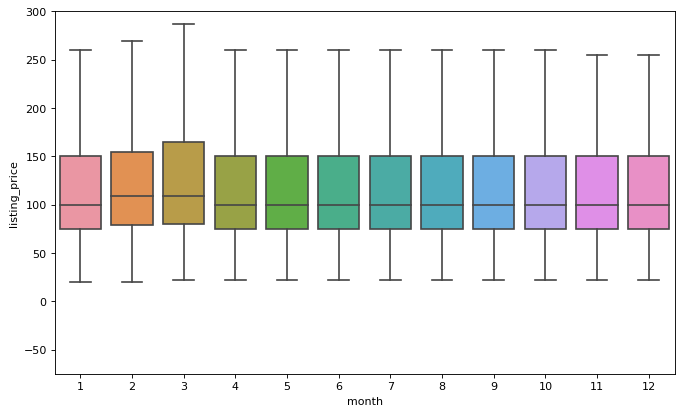

In [359]:
# only looking at available listings each month
hboxplot(df_calendar_2016, "month", "listing_price", "Monthly Listing Price Ranges")

As you can see that prices range are mostly within $80 - $150.

In [345]:
# aggregate by monthly
df_temp = df_calendar_2016.groupby('month').agg(
    average_price = ('listing_price', 'mean')
    , min_price = ('listing_price', 'min')
    , max_price = ('listing_price', 'max')
).reset_index()

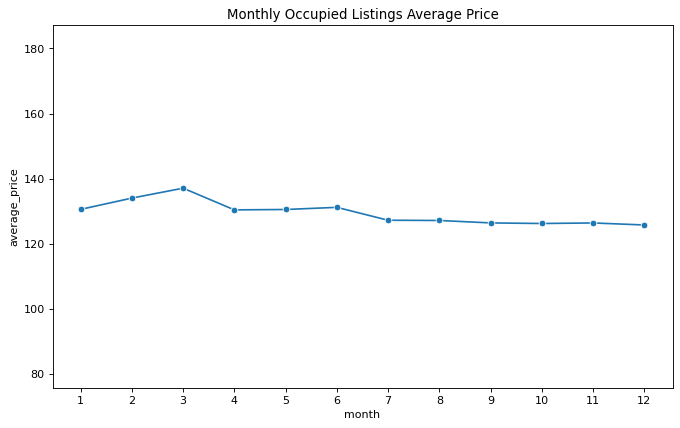

In [346]:
# visualize average_price for occupied listings
lineplot(df_temp, 'month', 'average_price', 'Monthly Occupied Listings Average Price')

To make it easier to look, we can see on the average listing prices have nightly price of ~$127–$137. Prices seems to surge in early months and began to slowly decrease by the end of it.

In [342]:
# aggregate by monthly
df_temp = df_calendar[(df_calendar['available']=='t')].groupby('month').agg(
    average_price = ('price', 'mean')
).reset_index()

Next, we want to look at available listings.

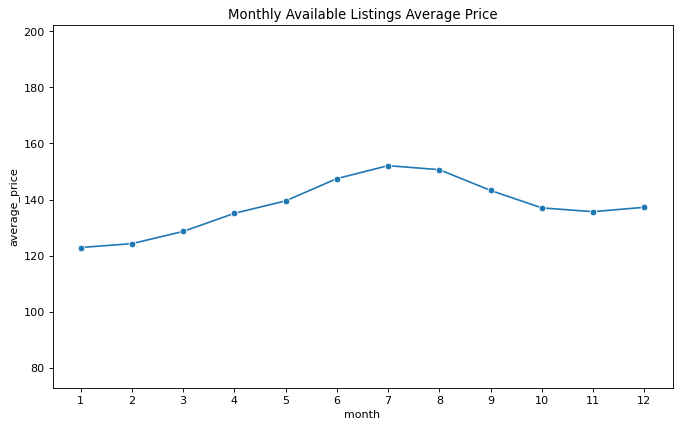

In [343]:
# visualize average_price for available listings
lineplot(df_temp, 'month', 'average_price', 'Monthly Available Listings Average Price')

However, for available/unoccupied listings it seems that the unfavorable rooms that was not picked had increase of price in mid-year. It seems that both unavailable and available listings have different behavior in terms of prices throughout the year.

#### average pricing per neighbourhoods

Now, we want to continue on looking at the prices and compare it towards our previous top 15 busiest neighbourhoods.

In [309]:
list_neighbourhoods = ['Capitol Hill',
'Belltown',
'Ballard',
'Minor',
'Queen Anne',
'Fremont',
'Wallingford',
'North Beacon Hill',
'Ravenna',
'Central Business District',
'Stevens',
'First Hill',
'University District',
'Greenwood',
'Lower Queen Anne']

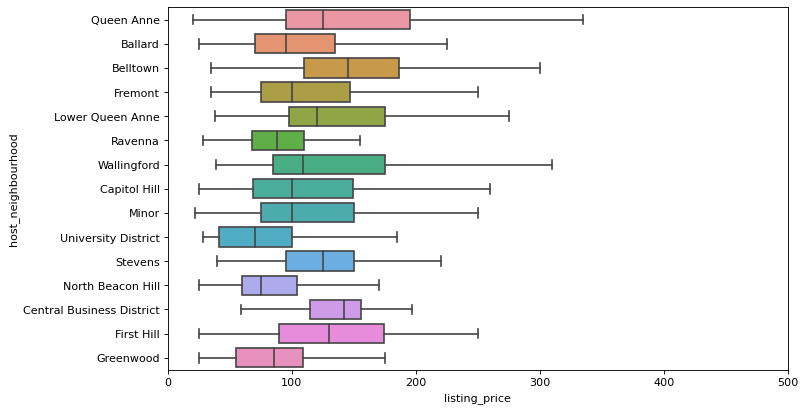

In [317]:

# only looking at available listings each month
figure(figsize=(10, 6), dpi=80)
sns.boxplot(data=df_listings[df_listings['host_neighbourhood'].isin(list_neighbourhoods)], y="host_neighbourhood", x="listing_price", fliersize=0)
plt.xlim([0, 500])
plt.show()

As you can see that the top 15 most dense neighbourhoods and their price ranges. For Capitol Hill, which is currently have the most listings, seems to have an average price range compared to others such as Queen Anne.

Looking at the chart, with ~$80–$130 worth of money you can easily find a place to stay for 1 night in Seattle with AirBnB.

in conclusion, on monthly average rented listing have nightly price of ~$127–$137, however for those that are available/unoccupied it surges to ~$150 in mid year (around July).

There are lots of options for listing that are within ~$80–$130 per night in Seattle’s high dense neighbourhoods such as Capitol Hill, Belltown, and Ballart.